In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# File to Load
file_path = "./Data/final_dataset.csv"

# Read file into Pandas DataFrame
data = pd.read_csv(file_path)

data.head()

year      month            carrier_name airport_abbr  \
0  2018  September  Frontier Airlines Inc.          PBI   
1  2018  September               Envoy Air          PBI   
2  2018  September   United Air Lines Inc.          PBI   
3  2018  September  Southwest Airlines Co.          PBI   
4  2018  September       Endeavor Air Inc.          PBI   

                       airport_name             city state  \
0  Palm Beach International Airport  West Palm Beach    FL   
1  Palm Beach International Airport  West Palm Beach    FL   
2  Palm Beach International Airport  West Palm Beach    FL   
3  Palm Beach International Airport  West Palm Beach    FL   
4  Palm Beach International Airport  West Palm Beach    FL   

   total_number_flights  air_carrier_delay  weather_delay  \
0                   8.0               0.85           0.00   
1                  25.0               0.00           0.00   
2                 114.0               6.97           0.01   
3                 143.0               8.14           0.00   
4                   3.0               0.68           0.00   

   national_aviation_system_delay  sercurity_delay  aircraft_arriving_late  \
0                            0.49              0.0                    1.65   
1                            2.00              0.0                    1.00   
2                            7.65              0.0                    5.37   
3                            1.49              0.0                   15.36   
4                            0.32              0.0                    0.00   

   flight_cancelled  flight_diverted  
0               0.0              0.0  
1               0.0              0.0  
2               0.0              0.0  
3               0.0              1.0  
4               0.0              0.0

In [4]:
# Add all delayed columns to get total number of delayed flights and subtract that from "total_number_flights" to get on time flights

# Create list of columns you want to add
col_list = ['air_carrier_delay','weather_delay','national_aviation_system_delay','sercurity_delay',
            'aircraft_arriving_late','flight_cancelled','flight_diverted']
col_list

data['delayed_sum'] = data[col_list].sum(axis=1)
data['on_time'] = data['total_number_flights'] - data['delayed_sum']
data.head()

year      month            carrier_name airport_abbr  \
0  2018  September  Frontier Airlines Inc.          PBI   
1  2018  September               Envoy Air          PBI   
2  2018  September   United Air Lines Inc.          PBI   
3  2018  September  Southwest Airlines Co.          PBI   
4  2018  September       Endeavor Air Inc.          PBI   

                       airport_name             city state  \
0  Palm Beach International Airport  West Palm Beach    FL   
1  Palm Beach International Airport  West Palm Beach    FL   
2  Palm Beach International Airport  West Palm Beach    FL   
3  Palm Beach International Airport  West Palm Beach    FL   
4  Palm Beach International Airport  West Palm Beach    FL   

   total_number_flights  air_carrier_delay  weather_delay  \
0                   8.0               0.85           0.00   
1                  25.0               0.00           0.00   
2                 114.0               6.97           0.01   
3                 143.0               8.14           0.00   
4                   3.0               0.68           0.00   

   national_aviation_system_delay  sercurity_delay  aircraft_arriving_late  \
0                            0.49              0.0                    1.65   
1                            2.00              0.0                    1.00   
2                            7.65              0.0                    5.37   
3                            1.49              0.0                   15.36   
4                            0.32              0.0                    0.00   

   flight_cancelled  flight_diverted  delayed_sum  on_time  
0               0.0              0.0         2.99     5.01  
1               0.0              0.0         3.00    22.00  
2               0.0              0.0        20.00    94.00  
3               0.0              1.0        25.99   117.01  
4               0.0              0.0         1.00     2.00

In [5]:
data.columns

Index(['year', 'month', 'carrier_name', 'airport_abbr', 'airport_name', 'city',
       'state', 'total_number_flights', 'air_carrier_delay', 'weather_delay',
       'national_aviation_system_delay', 'sercurity_delay',
       'aircraft_arriving_late', 'flight_cancelled', 'flight_diverted',
       'delayed_sum', 'on_time'],
      dtype='object')

In [6]:
# Dataframe of sum of flights by delay type
sum_rows = pd.DataFrame(data.sum(axis=0))
# Remove not needed rowss
sum_rows = sum_rows.drop(['year', 'month', 'carrier_name', 'airport_abbr', 'airport_name', 'city',
       'state', 'total_number_flights','delayed_sum', 'on_time'])
sum_rows = sum_rows.reset_index()
sum_rows = sum_rows.rename(columns = {'index':'delay_type'})

sum_rows

delay_type        0
0               air_carrier_delay   407870
1                   weather_delay  51321.9
2  national_aviation_system_delay   479101
3                 sercurity_delay  2767.63
4          aircraft_arriving_late   539121
5                flight_cancelled   144861
6                 flight_diverted    20535

In [7]:
# Create sizes and labels for the pie chart
sizes = sum_rows[0]
labels = ["Air Carrier","Weather","National Aviation System","Sercurity","Aircraft Arriving Late","Cancelled",
          "Diverted"]


<IPython.core.display.Javascript object>


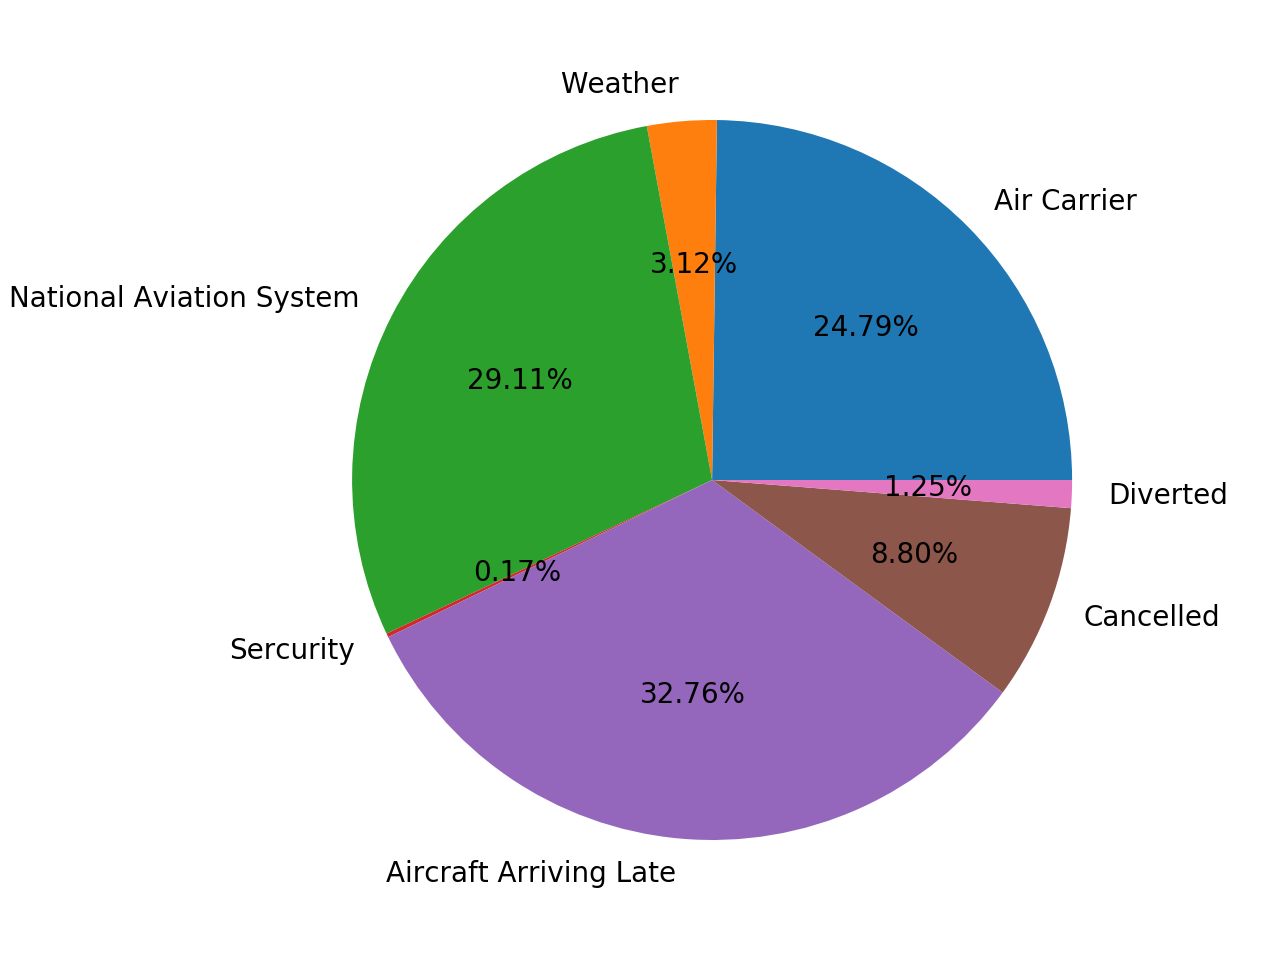

In [8]:
# Piechart of delay types
plt.pie(sizes, labels=labels,autopct="%1.2f%%")
plt.tight_layout()


In [9]:
# Group data by airport and save sum of flights to dataframe
data_groupby_airlines = data.groupby('carrier_name')

airlines_data = pd.DataFrame(data_groupby_airlines['total_number_flights'].sum())
airlines_data.head()

total_number_flights
carrier_name                                
Alaska Airlines Inc.                283834.0
Allegiant Air                       108362.0
American Airlines Inc.             1007390.0
Delta Air Lines Inc.               1052155.0
Endeavor Air Inc.                   272236.0

In [10]:
#airlines_data.describe()
pd.options.display.float_format = "{:.2f}".format
airlines_data.describe()
airlines_data.sum()


total_number_flights   7902481.00
dtype: float64